In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [25]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
feature_cols = ['Age', 'EstimatedSalary	']
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [27]:
#spliting dataset in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
#creating a model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)

In [30]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
#prediction
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
#show difference between treee that doesnt have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.88709677, 0.11290323],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.13157895, 0.86842105],
       [1.        , 0.        ],
       [0.17777778, 0.82222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88709677, 0.11290323],
       [0.88709677, 0.11290323],
       [1.        , 0.        ],
       [0.13157895, 0.86842105],
       [0.88709677, 0.11290323],
       [1.        , 0.        ],
       [0.17777778, 0.82222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.17777778, 0.82222222],
       [0.88709677, 0.11290323],
       [0.17777778, 0.82222222],
       [1.        , 0.        ],
       [0.17777778, 0.82222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88709677, 0.11290323],
       [1.        , 0.        ],
       [1.

In [33]:
#checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.94

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


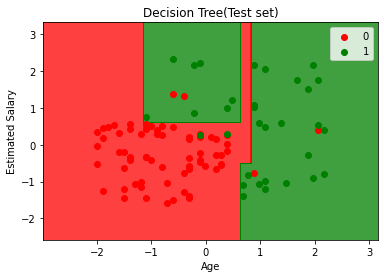

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))

plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))(i),label = j)

plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

C:\Users\sabin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\sabin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


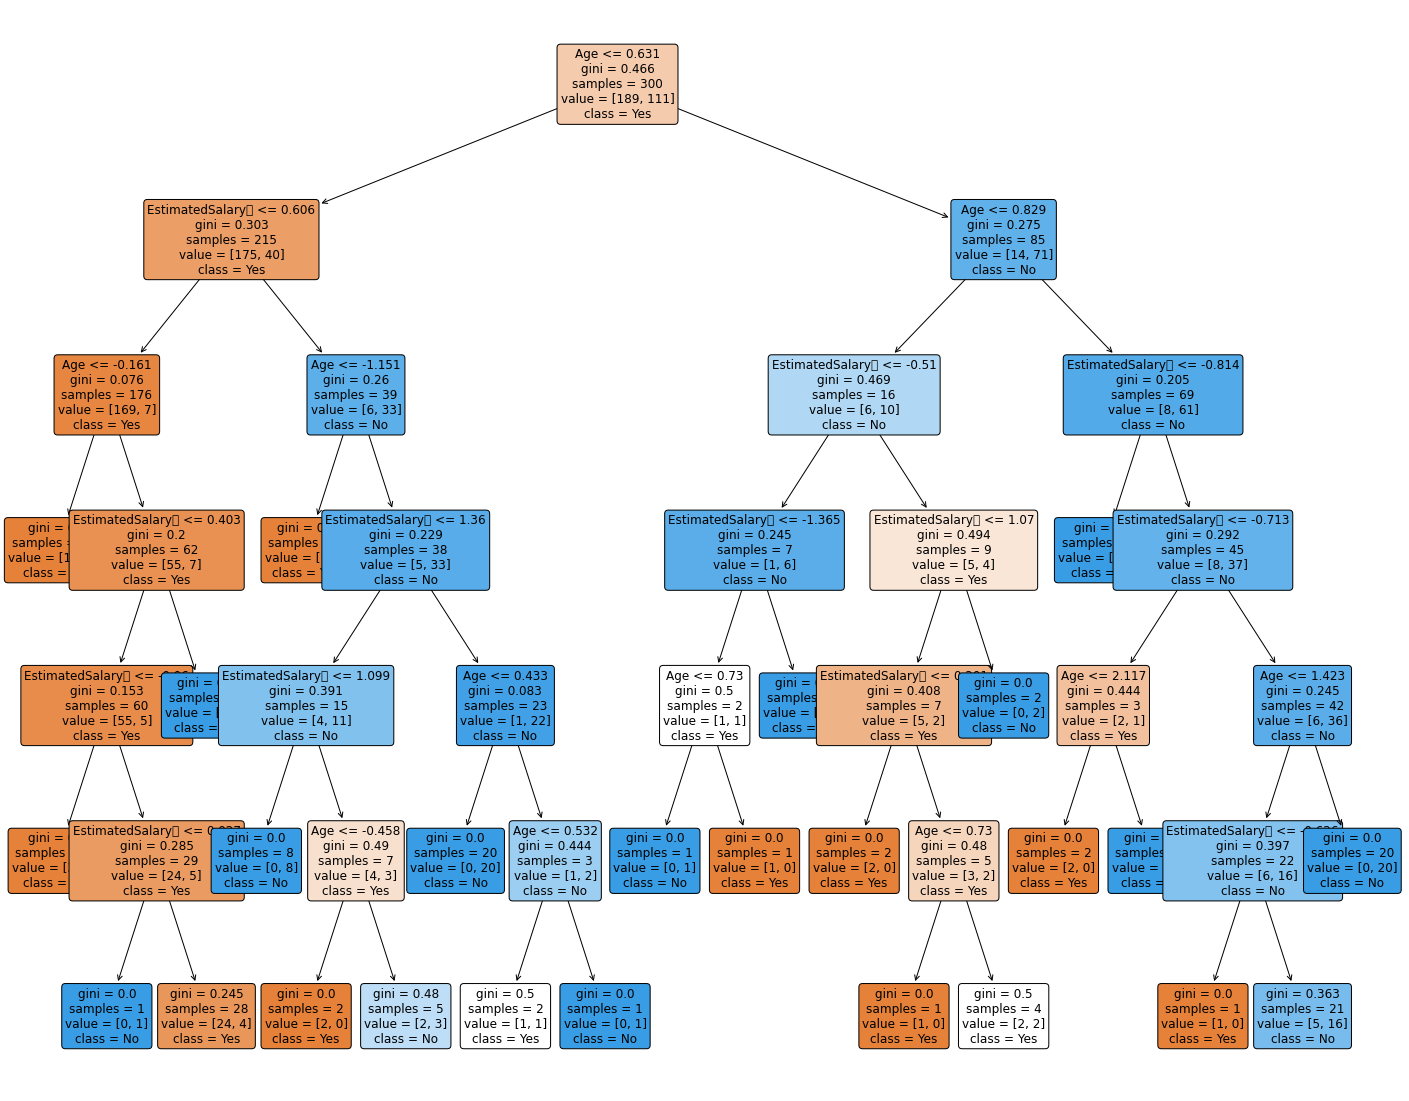

In [38]:
from sklearn import tree
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=feature_cols,class_names={0:'Yes', 1:'No'},filled=True,rounded=True,fontsize=12)